In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import pylab as pl 
import scipy.optimize as opt 
from sklearn import preprocessing 

In [2]:
df = pd.read_csv(r"C:\Users\USER\Downloads\16325569497737558.csv")
df.head(20)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Summaries the data (selecting the important ones) :

In [3]:
df = df[['age', 'sex', 'exng', 'caa', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'output' ]]
df.head()

,age,sex,exng,caa,cp,trtbps,chol,fbs,restecg,thalachh,output
0,63,1,0,0,3,145,233,1,0,150,1
1,37,1,0,0,2,130,250,0,1,187,1
2,41,0,0,0,1,130,204,0,0,172,1
3,56,1,0,0,1,120,236,0,1,178,1
4,57,0,1,0,0,120,354,0,1,163,1


In [5]:
df.shape

(303, 11)

C:\Users\USER\AppData\Local\Temp\ipykernel_15532\3357552668.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gnuplot')


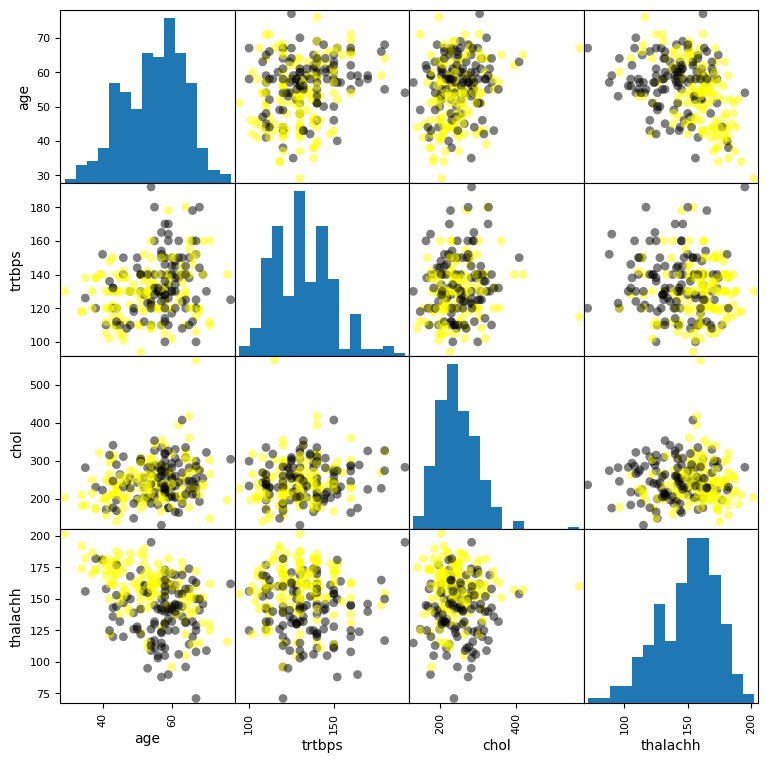

In [5]:
from sklearn.model_selection import train_test_split
from matplotlib import cm

X = df[['age', 'trtbps', 'chol', 'thalachh']]
y = df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

Defineing the Xdata and YData:

In [6]:
x = np.asarray(df[['age', 'sex', 'exng', 'caa', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh']])
x[0:5]

array([[ 63,   1,   0,   0,   3, 145, 233,   1,   0, 150],
       [ 37,   1,   0,   0,   2, 130, 250,   0,   1, 187],
       [ 41,   0,   0,   0,   1, 130, 204,   0,   0, 172],
       [ 56,   1,   0,   0,   1, 120, 236,   0,   1, 178],
       [ 57,   0,   1,   0,   0, 120, 354,   0,   1, 163]], dtype=int64)

In [7]:
y = np.asarray(df['output'])
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

We need to normalize the data for better response.Also I have imported the **preprocessing** module from sklearn package:

In [60]:
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[ 0.95,  0.68, -0.7 , -0.71,  1.97,  0.76, -0.26,  2.39, -1.01,
         0.02],
       [-1.92,  0.68, -0.7 , -0.71,  1.  , -0.09,  0.07, -0.42,  0.9 ,
         1.63],
       [-1.47, -1.47, -0.7 , -0.71,  0.03, -0.09, -0.82, -0.42, -1.01,
         0.98],
       [ 0.18,  0.68, -0.7 , -0.71,  0.03, -0.66, -0.2 , -0.42,  0.9 ,
         1.24],
       [ 0.29, -1.47,  1.44, -0.71, -0.94, -0.66,  2.08, -0.42,  0.9 ,
         0.58]])

It is time to spliting our data into train and test by **train_test_split** : 

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print('TRAIN SET:', x_train.shape, y_train.shape)
print('TEST SET:', x_test.shape, y_test.shape)

TRAIN SET: (242, 10) (242,)
TEST SET: (61, 10) (61,)


## Logistic Regression Method

It's time for building the **Logistic Regression** with "Scikit Learn" package.

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
Log = LogisticRegression(C=0.2, solver='liblinear').fit(x_train, y_train)
print(Log)

LogisticRegression(C=0.2, solver='liblinear')


Now we should predict our test dataset:

In [63]:
yhat= Log.predict(x_test)
print(yhat) 
print(y_test)

[1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1
 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1]
[1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1]


In [64]:
y_prob = Log.predict_proba(x_test)
print(y_prob)

[[0.29 0.71]
 [0.8  0.2 ]
 [0.42 0.58]
 [0.02 0.98]
 [0.14 0.86]
 [0.54 0.46]
 [0.63 0.37]
 [0.12 0.88]
 [0.31 0.69]
 [0.16 0.84]
 [0.1  0.9 ]
 [0.08 0.92]
 [0.18 0.82]
 [0.78 0.22]
 [0.4  0.6 ]
 [0.92 0.08]
 [0.27 0.73]
 [0.24 0.76]
 [0.96 0.04]
 [0.3  0.7 ]
 [0.15 0.85]
 [0.16 0.84]
 [0.92 0.08]
 [0.28 0.72]
 [0.26 0.74]
 [0.81 0.19]
 [0.58 0.42]
 [0.05 0.95]
 [0.7  0.3 ]
 [0.98 0.02]
 [0.67 0.33]
 [0.41 0.59]
 [0.04 0.96]
 [0.27 0.73]
 [0.29 0.71]
 [0.05 0.95]
 [0.16 0.84]
 [0.27 0.73]
 [0.35 0.65]
 [0.94 0.06]
 [0.83 0.17]
 [0.91 0.09]
 [0.87 0.13]
 [0.26 0.74]
 [0.18 0.82]
 [0.24 0.76]
 [0.91 0.09]
 [0.72 0.28]
 [0.81 0.19]
 [0.14 0.86]
 [0.85 0.15]
 [0.09 0.91]
 [0.39 0.61]
 [0.6  0.4 ]
 [0.24 0.76]
 [0.01 0.99]
 [0.2  0.8 ]
 [0.22 0.78]
 [0.76 0.24]
 [0.92 0.08]
 [0.08 0.92]]


## Evaluaton Time: 

It's time for evaluating our model with **Jaccard Index**

In [65]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label=0)

0.7777777777777778

**Log Los** :

In [66]:
from sklearn.metrics import log_loss
log_loss(y_test, y_prob)

0.32856478810582046

using **confusion matrix** for examing the accuracy:

In [67]:
import itertools
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(cm, classes, normalize= True,
                          title='Confusion matrix', cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('int') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix without normalizing the data')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Real')
    plt.xlabel('Predicted')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[34  2]
 [ 4 21]]


In [68]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

Confusion Matrix without normalizing the data
[[34  2]
 [ 4 21]]


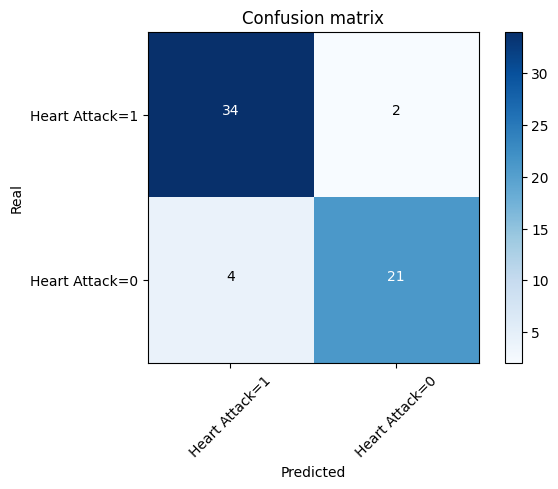

In [69]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Heart Attack=1','Heart Attack=0'],normalize= False,  title='Confusion matrix')

As it's shown, we have predicted that 4 persons won't experience Heart Attack which is not correct. It will be an enormous mistake in our prediction model. So the accuaracy of **Logistic Regression** is a little bit low! We should try another method for our model.

In [70]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        25
           1       0.89      0.94      0.92        36

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61



### f1-score :

In [71]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, yhat)
print ("The f1-score of our model is:", f1)

The f1-score of our model is: 0.918918918918919


### Log Los:

In [72]:
from sklearn.metrics import log_loss
log_loss(y_test, y_prob)

0.32856478810582046

## K Nearest Neighbor (KNN) method:

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)


[0.77 0.7  0.75 0.79 0.8  0.8  0.89 0.82 0.8 ]


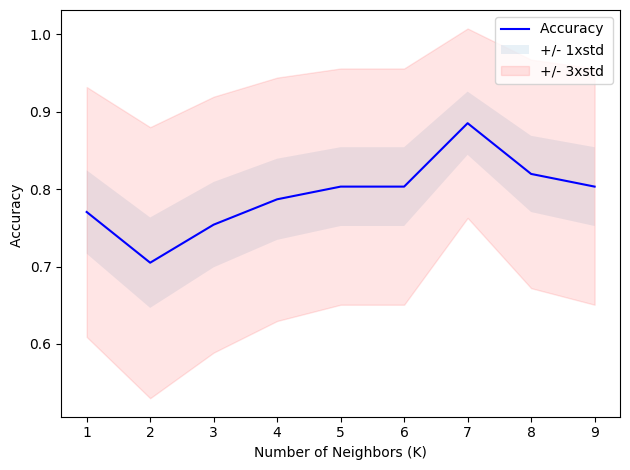

In [74]:
plt.plot(range(1,Ks), mean_acc, 'b')
plt.fill_between(range(1,Ks), mean_acc-1 * std_acc, mean_acc+1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks), mean_acc-3 * std_acc, mean_acc+3 * std_acc, alpha=0.10, color="red")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [86]:
print( "The best accuracy is", mean_acc.max(), "by k=", mean_acc.argmax()+1) 


The best accuracy is 0.8852459016393442 by k= 7


In conclusion, **k = 7** is the best opition for this KNN model.


In [76]:
k = 7 
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
print(neigh)

KNeighborsClassifier(n_neighbors=7)


In [77]:
yhat = neigh.predict(x_test)
print(y_test[0:10])
print(yhat[0:10])

[1 0 1 1 0 0 0 1 1 1]
[1 0 1 1 1 0 0 1 1 1]


## KNN Evaluation

In [78]:
print("The accuracy of 'KNN Model' is:", metrics.accuracy_score(y_test, yhat))

The accuracy of 'KNN Model' is: 0.8852459016393442


In [79]:
def plot_confusion_matrix(cm, classes, normalize= True,
                          title='Confusion matrix', cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('int') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix without normalizing the data')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Real')
    plt.xlabel('Predicted')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[34  2]
 [ 5 20]]


Confusion Matrix without normalizing the data
[[34  2]
 [ 5 20]]


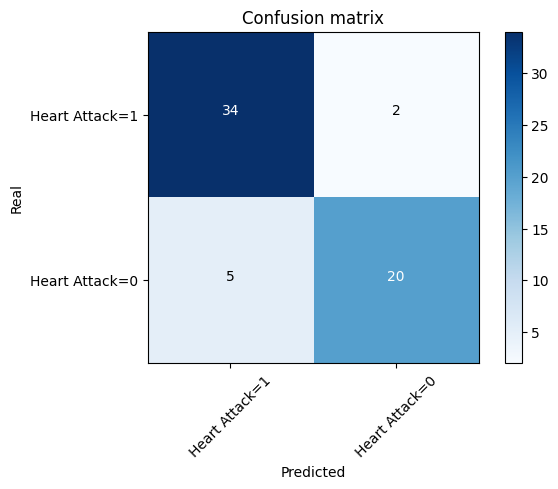

In [80]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Heart Attack=1','Heart Attack=0'],normalize= False,  title='Confusion matrix')

Actually **KNN Model** worse than **Logistic Regression Model** because we have predicted 5 items in a wrong way!

In [81]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.87      0.94      0.91        36

    accuracy                           0.89        61
   macro avg       0.89      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61



### Jaccard:

In [124]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label=1)

0.8048780487804879

### f1_score:

In [82]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, yhat)
print ("The f1-score of our model is:", f1)

The f1-score of our model is: 0.9066666666666667


### Log Los:

In [84]:
from sklearn.metrics import log_loss
loglos = log_loss(y_test, y_prob)
print("The LogLos point is:", loglos)

The LogLos point is: 0.32856478810582046


# Decision Tree Model:

In [89]:
from sklearn.tree import DecisionTreeClassifier

HeartTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
HeartTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Now we should fit the data(x_train and y_train):

In [90]:
HeartTree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [94]:
yhat = HeartTree.predict(x_test)

print(y_test[0:10])
print(yhat[0:10])

[1 0 1 1 0 0 0 1 1 1]
[1 0 1 1 0 0 0 1 1 1]


## Decision Tree Evaluation

In [97]:
print("Accuracy:", metrics.accuracy_score(y_test, yhat))

Accuracy: 0.819672131147541


### Confusion Matrix:

In [98]:
def plot_confusion_matrix(cm, classes, normalize= True,
                          title='Confusion matrix', cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('int') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix without normalizing the data')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Real')
    plt.xlabel('Predicted')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[28  8]
 [ 3 22]]


Confusion Matrix without normalizing the data
[[28  8]
 [ 3 22]]


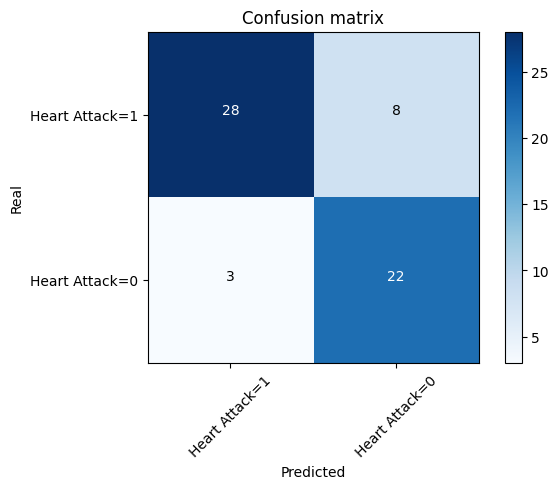

In [99]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Heart Attack=1','Heart Attack=0'],normalize= False,  title='Confusion matrix')

In [100]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        25
           1       0.90      0.78      0.84        36

    accuracy                           0.82        61
   macro avg       0.82      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61



### f1-score:

In [101]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, yhat)
print ("The f1-score of our model is:", f1)

The f1-score of our model is: 0.835820895522388


### Log Los:

In [117]:

loglos = log_loss(y_test, y_prob)
print("The LogLos point is:", loglos)

The LogLos point is: 0.32856478810582046


# SVM Model:

In [109]:
from sklearn import svm
Svm = svm.SVC(kernel='rbf')
Svm.fit(x_train, y_train) 

SVC()

My "Kernels" would be: Linear, Polynomial, RBF, Sigmiod

In [112]:
yhat = Svm.predict(x_test)
print(y_test[0:10])
print(yhat[0:10])

[1 0 1 1 0 0 0 1 1 1]
[1 0 1 1 1 0 0 1 1 1]


## SVM Evaluation

In [113]:
from sklearn.metrics import classification_report
import itertools

In [114]:
def plot_confusion_matrix(cm, classes, normalize= True,
                          title='Confusion matrix', cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('int') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix without normalizing the data')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Real')
    plt.xlabel('Predicted')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[33  3]
 [ 5 20]]


Confusion Matrix without normalizing the data
[[33  3]
 [ 5 20]]


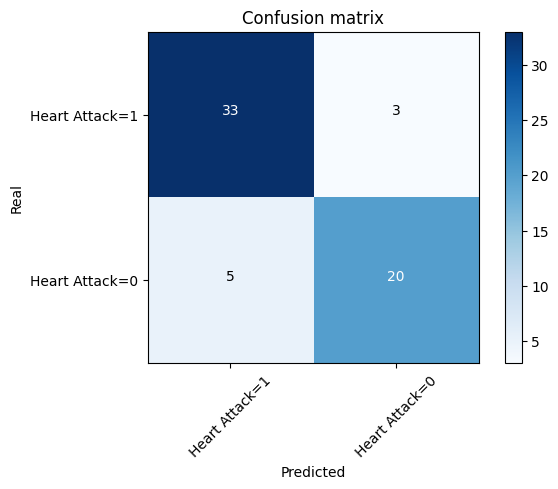

In [115]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Heart Attack=1','Heart Attack=0'],normalize= False,  title='Confusion matrix')

### f1-score:

In [116]:
f1 = f1_score(y_test, yhat, average='weighted') 
print("The f1-score is:", f1)

The f1-score is: 0.867892482646581


### Log Los:

In [118]:
loglos = log_loss(y_test, y_prob)
print("The LogLos point is:", loglos)

The LogLos point is: 0.32856478810582046


### Jaccard Index:

In [122]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=1)

0.8048780487804879